<a href="https://colab.research.google.com/github/Kaushal28/ML/blob/develop/Linear_Regression_using_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Linear regression using batch gradient descent

#imports
import numpy as np
import time
from sklearn import datasets
from matplotlib import pyplot as plt

In [0]:
#Generate linear regression data
X, y = datasets.make_regression(n_samples = 100, n_features = 1, random_state = 10, noise = 12, bias = 10)

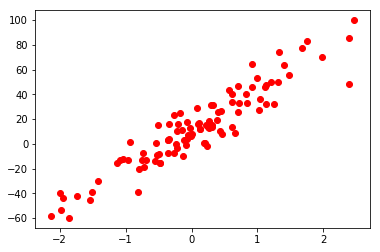

In [0]:
#plote the generated data
plt.scatter(X, y, color = 'red')
plt.show()

In [0]:
def gradient(ip, actual_op, predicted_op):
    return (actual_op - predicted_op) * ip

In [0]:
def predict(ip, coef):
    return np.dot(np.append(ip, 1), coef)

In [0]:
def total_cost(X, y, theta):
    total_cost = np.zeros(2)
    for each_training_ip, each_training_op in zip(X, y):
        total_cost[0] += gradient(each_training_ip, each_training_op, predict(each_training_ip, theta))
        total_cost[1] += gradient(1, each_training_op, predict(each_training_ip, theta))
    return total_cost

In [0]:
def tolerance(theta, previous_theta):
    return (theta - previous_theta).max()

In [0]:
def gradient_descent(X, y, eta, tol):
    
    #initialize parameters of line
    theta = np.zeros(2)
    historical_theta = [theta]
    
    while True:
        theta = theta + eta * total_cost(X, y, theta)
        historical_theta.append(theta)
        if tolerance(theta, historical_theta[len(historical_theta)-2]) <= tol:
            return theta, historical_theta

In [0]:
start_time = time.time()
theta, historical_theta = gradient_descent(X, y, eta = 0.01, tol = 0.0001)
end_time = time.time()
print ('Completed in {0} iterations in {1} seconds'.format(len(historical_theta)-1, end_time-start_time))
print ('Computed coeffients: {}'.format(theta))

Completed in 7 iterations in 0.028277158737182617 seconds
Computed coeffients: [30.79615471 10.63365258]


In [0]:
#Compare with actual output using sklearn
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
start_time = time.time()
linear_reg.fit(X, y)
end_time = time.time()
print ('Completed in {0} seconds'.format(end_time-start_time))
print (linear_reg.coef_)
print (linear_reg.intercept_)

Completed in 0.020981550216674805 seconds
[30.7961586]
10.633649813050983


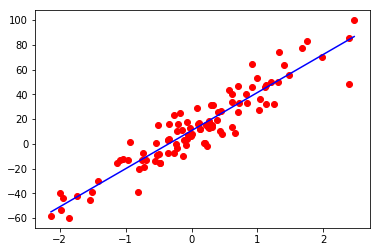

In [0]:
# plot the actual best fit line
plt.scatter(X, y, color = 'red')
plt.plot([min(X), max(X)], [predict([min(X)], theta), predict([max(X)], theta)], color = 'blue')
plt.show()

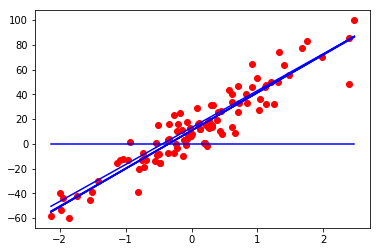

In [0]:
# plot the improvements in best fit line
plt.scatter(X, y, color = 'red')
for theta in historical_theta:
    plt.plot([min(X), max(X)], [predict([min(X)], theta), predict([max(X)], theta)], color = 'blue')
plt.show()

In [0]:
# print improvements in theta
for theta in historical_theta:
    print (theta)

[0. 0.]
[29.838221   13.07937796]
[30.5458612  10.70972602]
[30.77546756 10.6535276 ]
[30.79336898 10.63529303]
[30.79586483 10.63387136]
[30.79612381 10.63367314]
[30.79615471 10.63365258]
